In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
df = pd.read_pickle("./results.pkl")
df[df['compression_method'] == 'ptqRFT']

,model_name,compression_method,sparsity_level,test,robustness
2,normal,ptqRFT,int16,0.8338,0.7718
5,normal,ptqRFT,int8,0.8438,0.7825
8,normal,ptqRFT,int4,0.8059,0.8092
11,normal,ptqRFT,int2,0.1000,0.1000
14,normal,ptqRFT,int1,0.1000,0.1000


In [3]:
def cut_int(x):
    if type(x) == str:
        if x[0:3] == 'int':
            x = int(x[3:])
        else: x = 0
    return x

def get_mean_std_columns(df):
    df['test_mean'] = df.groupby(['model_name','compression_method','sparsity_level'])["test"].transform('mean')
    df['robustness_mean'] = df.groupby(['model_name','compression_method','sparsity_level'])["robustness"].transform('mean')
    df['test_std'] = df.groupby(['model_name','compression_method','sparsity_level'])["test"].transform('std')
    df['robustness_std'] = df.groupby(['model_name','compression_method','sparsity_level'])["robustness"].transform('std')
    df['int_sort'] = df["sparsity_level"].map(lambda x: cut_int(x))
    return df

In [4]:
def plot_levels(df,standard_model,adversarial_model,plotname):
    fig, ax = plt.subplots(figsize=(8,6))
    #capsize for errorbars
    csi = 5.0
    models = [standard_model, adversarial_model]
    
    params = {'font.size': 14,
          'axes.labelsize':14,
          'axes.titlesize':14,
          'axes.titleweight':'bold',
          'legend.fontsize': 14,
         }
    colors = ['blue','green','orange','red']
    
    df = df.sort_values("int_sort",ascending=False)
    
    label_count=0
    label_names = ['standard(test)','standard(robustness)','adversarial(test)','adversarial(robustness)']
    
    for model in models:
        model_name = model[0]
        compression_method = model[1]
        for measurement in ['test','robustness']:
            df_i = df
            df_i = df_i.loc[df_i['model_name'] == model_name]
            df_i = df_i.loc[df_i['compression_method'] == compression_method]
            
            mean = df_i[measurement+"_mean"].values
            std = df_i[measurement+"_std"].values
            ax.plot(df_i['sparsity_level'].values, mean, label=label_names[label_count], color=colors[label_count], linestyle='-', marker='o')
            ax.errorbar(df_i['sparsity_level'].values, mean, std, color=colors[label_count], linestyle='None',  marker='None',capsize=csi)
            label_count += 1
    
    ax.set_xlabel('Sparsity')
    ax.set_ylabel('Accuracy')
    #ax.set_title('Error/Adv. Error vs Sparsity')
    ax.legend()
    matplotlib.rcParams.update(params)
    ax.grid()
    plt.savefig(plotname,bbox_inches='tight')
    plt.show()

/Users/valdemarjacobihenriksen/anaconda3/envs/bachenv/lib/python3.11/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


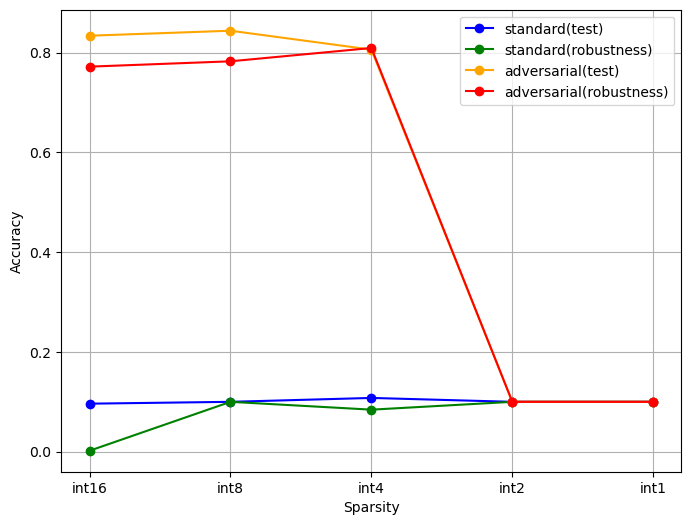

In [6]:
df = get_mean_std_columns(df)
plot_levels(df,['normal','ptq'],['normal','ptqRFT'],'ptqRFT_sparsity_plot')

### test data... 

#model_name = "normal_model"
df_dict = {'model_name':[],'compression_method':[],'sparsity_level':[],'test':[],'robustness':[]}
runs = ['normal','normal','normal','robust','robust','robust']
qmethods = ['ptq','ptqRFT','ptqNFT']
qlevels = ['int16','int8','int4','int2','int1']
i = 0
for run in runs:
    i += 1
    for qm in qmethods:
        for ql in qlevels:
            df_dict['model_name'].append(run)
            df_dict['compression_method'].append(qm)
            df_dict['sparsity_level'].append(ql)
            if i < 4:
                df_dict['test'].append(np.random.uniform(0.7,0.9))
                df_dict['robustness'].append(np.random.uniform(0.6,0.7))
            else:
                df_dict['test'].append(np.random.uniform(0.65,0.8))
                df_dict['robustness'].append(np.random.uniform(0.65,0.78))
df = pd.DataFrame(df_dict)
df.to_pickle(f'./dummy.pkl')
df2 = pd.read_pickle("./dummy.pkl")
df2